### Importing Libraries

In [2115]:
# K-means clustering algorithm
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.metrics import accuracy_score,confusion_matrix, recall_score,precision_score,f1_score
from sklearn.metrics import classification_report


In [2116]:
#Naming the columns
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class_labels'] # As per the iris dataset information

In [2117]:
# Loading the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)

In [2118]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2119]:
# Some basic statistical analysis about the data
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2120]:
df.value_counts("Class_labels")

Class_labels
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

/Library/Python/3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


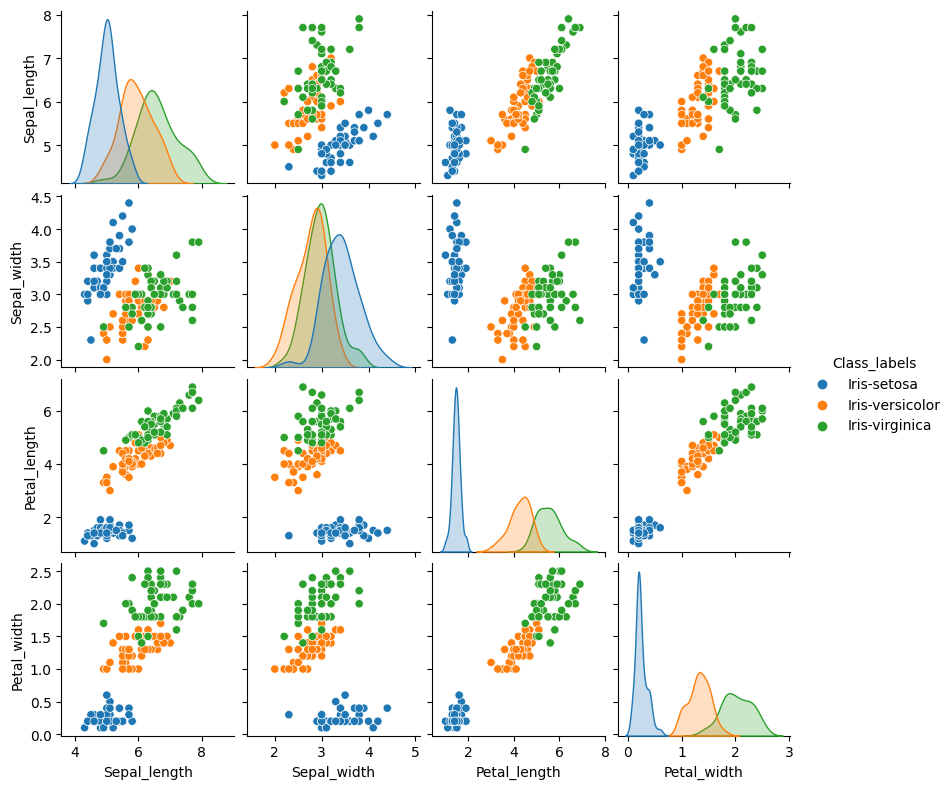

In [2121]:
sns.pairplot(df,hue='Class_labels', height=2)

In [2122]:
subset_df = df[['Sepal_length', 'Sepal_width','Petal_length','Petal_width']]
subset_df.corr(method='pearson')

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


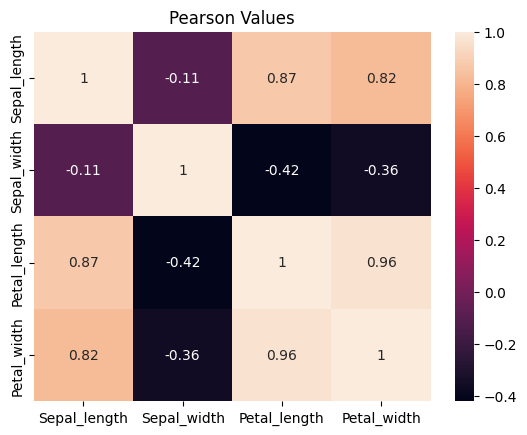

In [2123]:
sns.heatmap(subset_df.corr(method='pearson'), 
			annot = True);
plt.title("Pearson Values") 
plt.show()

### Mapping Categorical labels to Numerical values

In [2124]:
mapping = {"Iris-setosa": 0,"Iris-versicolor": 1, "Iris-virginica": 2}
df["ClassLabels"] = df["Class_labels"].map(mapping)

print(df)

     Sepal_length  Sepal_width  Petal_length  Petal_width    Class_labels  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     ClassLabels  
0              0  
1              0  
2              0  

### Removing Categorical label Column

In [2125]:
df = df.drop('Class_labels',axis=1)

In [2126]:
y = df['ClassLabels']
X = df.drop('ClassLabels',axis=1)
X.shape, y.shape

((150, 4), (150,))

### Splitting the dataset into Train and Test sets: 75-25 split

In [2127]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

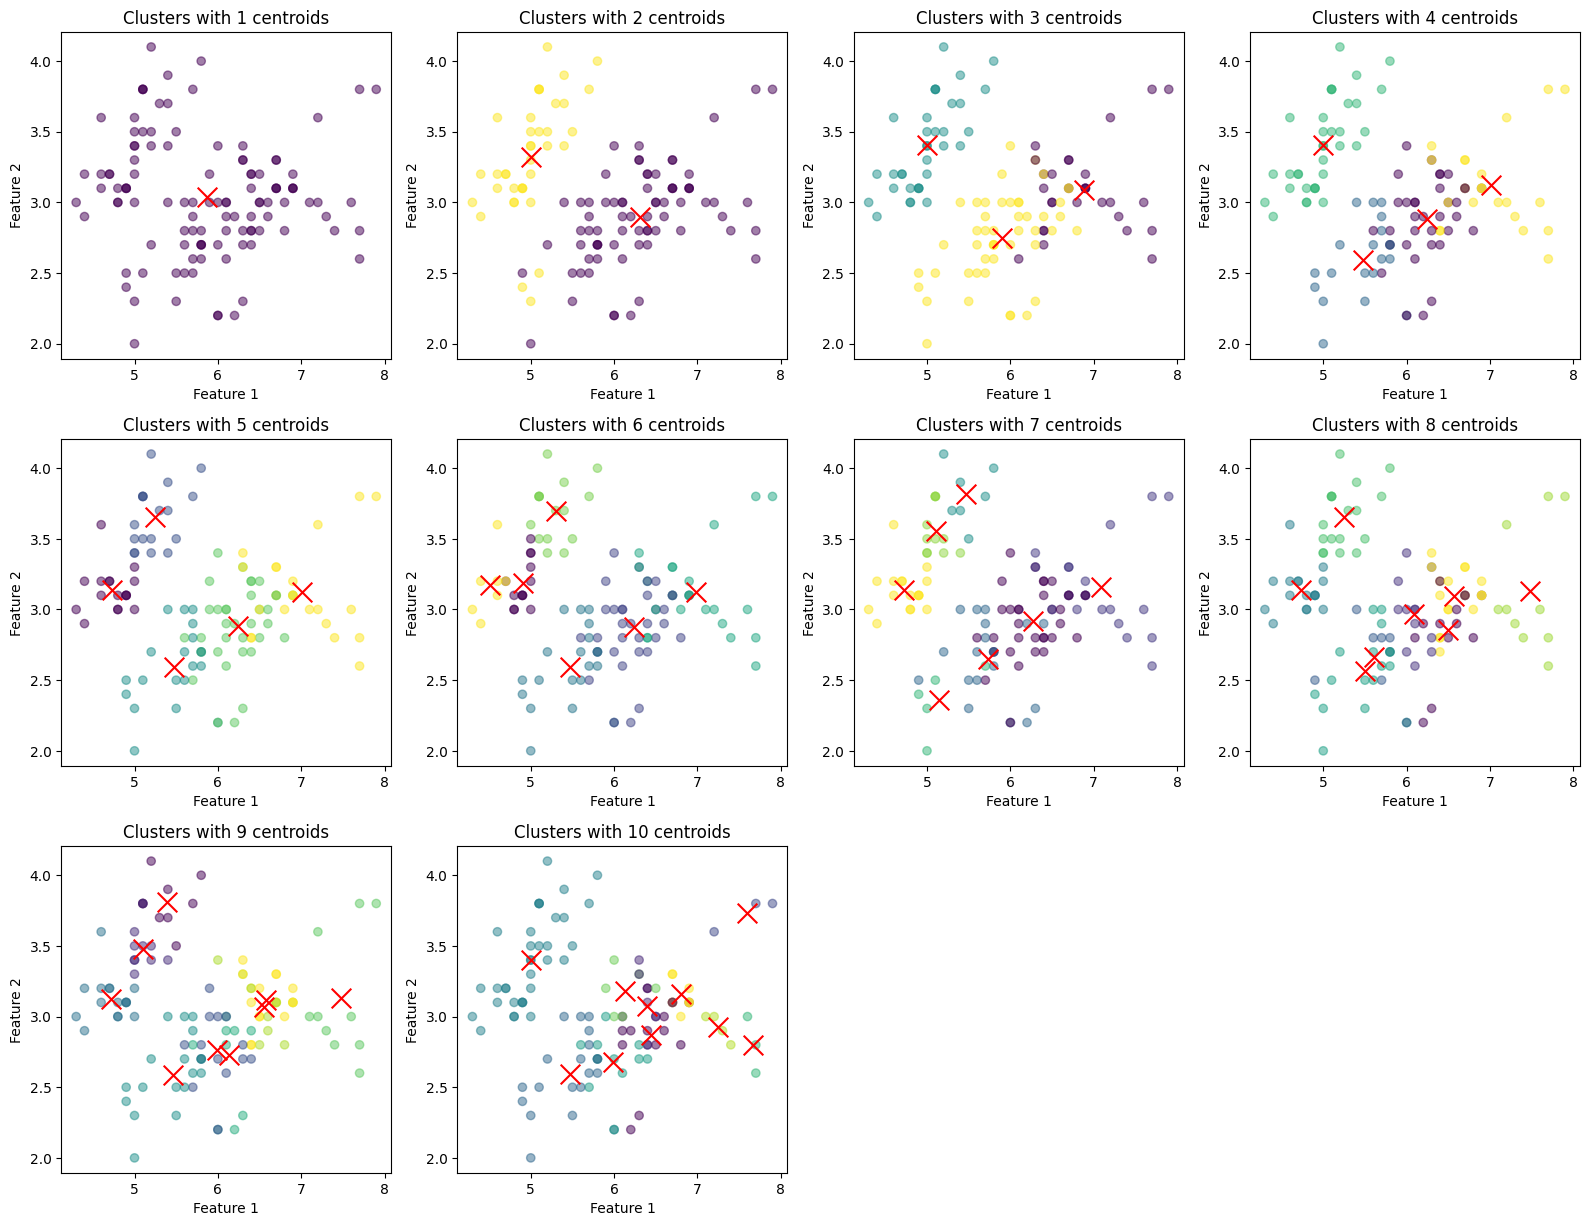

Optimal K value: 1 [-116.90788146  -24.3437568   -10.62107637   -5.11547908   -1.24655619
   -2.64703399   -7.34968312   -1.85162632    2.68305816]


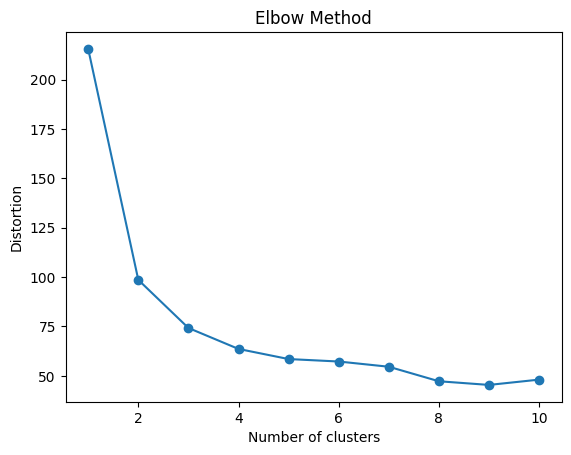

In [2128]:
np.random.seed(0)
# Calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# KMeans clustering implementation
class KMeans:
    def __init__(self, k, max_iters=300):
        self.k = k
        self.max_iters = max_iters

    def fit(self, data):
        self.centroids = data.sample(self.k).values
        for _ in range(self.max_iters):
            clusters = [[] for _ in range(self.k)]
            for _, point in data.iterrows():
                distances = [euclidean_distance(point.values, centroid) for centroid in self.centroids]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(point.values)
            prev_centroids = self.centroids.copy()
            for i in range(self.k):
                self.centroids[i] = np.mean(clusters[i], axis=0)
            if np.allclose(prev_centroids, self.centroids):
                break

    def predict(self, data):
        predictions = []
        for _, point in data.iterrows():
            distances = [euclidean_distance(point.values, centroid) for centroid in self.centroids]
            cluster_idx = np.argmin(distances)
            predictions.append(cluster_idx)
        return np.array(predictions)


# Elbow Method to find optimal number of clusters
def elbow(data, max_k=10):
    distortions = []
    plt.figure(figsize=(16, 16))
    for k in range(1, max_k + 1):
        kmeans = KMeans(k)
        kmeans.fit(data)
        centroids = kmeans.centroids
        distortions.append(sum(np.min([euclidean_distance(point.values, centroid) for centroid in centroids]) for _, point in data.iterrows()))
        
        # Plot data points and centroids
        plt.subplot(4, 4, k)
        plt.scatter(data['Sepal_length'], data['Sepal_width'], c=kmeans.predict(data), cmap='viridis', alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
        plt.title(f'Clusters with {k} centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()
    # Find the optimal k value
    optimal_k = np.argmin(np.diff(distortions)) + 1
    print("Optimal K value:", optimal_k,np.diff(distortions))
    # Plot the Elbow Method
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()
    return optimal_k


elbow(X_train, max_k=10)
kmeans_model = KMeans(k=3)  
kmeans_model.fit(X_train)


# Took 3 clusters as the number of class labels are 3

In [2129]:
test_accuracy = accuracy_score(y_test, kmeans_model.predict(X_test))
train_accuracy = accuracy_score(y_train, kmeans_model.predict(X_train))
print('Clusters = {} \nTrain Accuracy -> {}\nTest Accuracy -> {}'.format(3,train_accuracy,test_accuracy))


Clusters = 3 
Train Accuracy -> 0.8839285714285714
Test Accuracy -> 0.8947368421052632


In [ ]:
print(classification_report(y_test, kmeans_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      0.92      0.85        12
           2       0.89      0.73      0.80        11

    accuracy                           0.89        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.90      0.89      0.89        38



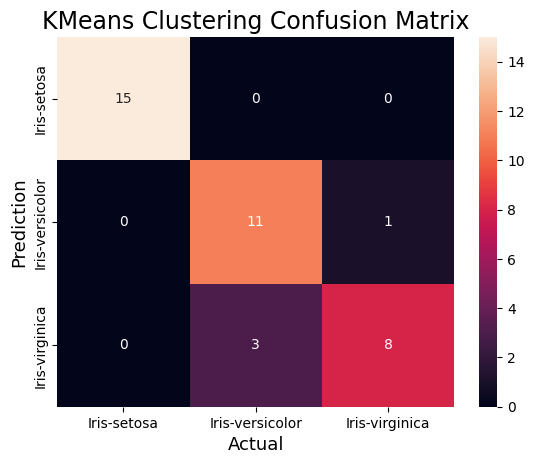

In [2131]:
cm = confusion_matrix(y_test, kmeans_model.predict(X_test))

sns.heatmap(cm, 
            annot=True,
            xticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'],
            yticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('KMeans Clustering Confusion Matrix',fontsize=17)
plt.show()